In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv('SHSD_Open_Data_1980_2021.csv')
df1.head()


,LA_CODE,LA_NAME,LAD20CD,LAD20NM,LAD20TYPE,CTY20CD,CTY20NM,MCTY20CD,MCTY20NM,RGN20CD,RGN20NM,CTRY20CD,CTRY20NM,Year,Provider,Disposal Type,Disposal Detail Tier 1,Disposal Detail Tier 2,Units
0,E07000157,Alnwick,E06000057,Northumberland,E06,NaN,NaN,NaN,NaN,E12000001,North East,E92000001,England,1997-98,LA,Demolition,Demolition,Demolition,0.0
1,E07000158,Berwick-upon-Tweed,E06000057,Northumberland,E06,NaN,NaN,NaN,NaN,E12000001,North East,E92000001,England,1997-98,LA,Demolition,Demolition,Demolition,0.0
2,E07000159,Blyth Valley,E06000057,Northumberland,E06,NaN,NaN,NaN,NaN,E12000001,North East,E92000001,England,1997-98,LA,Demolition,Demolition,Demolition,0.0
3,E07000160,Castle Morpeth,E06000057,Northumberland,E06,NaN,NaN,NaN,NaN,E12000001,North East,E92000001,England,1997-98,LA,Demolition,Demolition,Demolition,0.0
4,E07000054,Chester-le-Street,E06000047,County Durham,E06,NaN,NaN,NaN,NaN,E12000001,North East,E92000001,England,1997-98,LA,Demolition,Demolition,Demolition,0.0


In [3]:
df1[df1.loc[:,'LA_NAME']=='Coventry']

,LA_CODE,LA_NAME,LAD20CD,LAD20NM,LAD20TYPE,CTY20CD,CTY20NM,MCTY20CD,MCTY20NM,RGN20CD,RGN20NM,CTRY20CD,CTRY20NM,Year,Provider,Disposal Type,Disposal Detail Tier 1,Disposal Detail Tier 2,Units
277,E08000026,Coventry,E08000026,Coventry,E08,NaN,NaN,E11000005,West Midlands,E12000005,West Midlands,E92000001,England,1997-98,LA,Demolition,Demolition,Demolition,120.0
629,E08000026,Coventry,E08000026,Coventry,E08,NaN,NaN,E11000005,West Midlands,E12000005,West Midlands,E92000001,England,1998-99,LA,Demolition,Demolition,Demolition,0.0
980,E08000026,Coventry,E08000026,Coventry,E08,NaN,NaN,E11000005,West Midlands,E12000005,West Midlands,E92000001,England,1999-00,LA,Demolition,Demolition,Demolition,0.0
1333,E08000026,Coventry,E08000026,Coventry,E08,NaN,NaN,E11000005,West Midlands,E12000005,West Midlands,E92000001,England,2000-01,LA,Demolition,Demolition,Demolition,0.0
1679,E08000026,Coventry,E08000026,Coventry,E08,NaN,NaN,E11000005,West Midlands,E12000005,West Midlands,E92000001,England,2001-02,LA,Demolition,Demolition,Demolition,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86213,E08000026,Coventry,E08000026,Coventry,E08,NaN,NaN,E11000005,West Midlands,E12000005,West Midlands,E92000001,England,2020-21,PRP,Sale,Other Sales,Other Sales,0.0
86395,E08000026,Coventry,E08000026,Coventry,E08,NaN,NaN,E11000005,West Midlands,E12000005,West Midlands,E92000001,England,2020-21,PRP,Demolition,Demolition,Demolition,29.0
86410,E08000026,Coventry,E08000026,Coventry,E08,NaN,NaN,E11000005,West Midlands,E12000005,West Midlands,E92000001,England,2020-21,PRP,Demolition,Demolition,Demolition,0.0
86466,E08000026,Coventry,E08000026,Coventry,E08,NaN,NaN,E11000005,West Midlands,E12000005,West Midlands,E92000001,England,2020-21,PRP,Demolition,Demolition,Demolition,0.0


In [4]:
df_t = df1[['LA_CODE','LA_NAME','Year','Disposal Detail Tier 2','Units']].groupby(['LA_CODE','LA_NAME','Year','Disposal Detail Tier 2']).sum()


In [5]:
df_t.reset_index(inplace=True)
df_t.columns = ['LA_code','LA','year','type','units']

In [6]:
df_t = df_t.pivot(index=['LA_code','LA','year'],columns='type',values='units')

In [7]:
df_t.reset_index(inplace=True)

In [8]:
df_t.head()

type,LA_code,LA,year,Demolition,LCHO Sales,Other Sales,Other sales to sitting tenants,Right to Buy,Sales to sitting tenants
0,E06000001,Hartlepool,1980-81,NaN,NaN,NaN,NaN,38.0,NaN
1,E06000001,Hartlepool,1981-82,NaN,NaN,NaN,NaN,1109.0,NaN
2,E06000001,Hartlepool,1982-83,NaN,NaN,NaN,NaN,727.0,NaN
3,E06000001,Hartlepool,1983-84,NaN,NaN,NaN,NaN,184.0,NaN
4,E06000001,Hartlepool,1984-85,NaN,NaN,NaN,NaN,176.0,NaN


In [9]:
df_t.replace(np.nan, 0,inplace=True)
df_t['total'] = df_t['Demolition'] + df_t['LCHO Sales'] + df_t['Other Sales'] + df_t['Other sales to sitting tenants'] + df_t['Right to Buy'] + df_t['Sales to sitting tenants']
df_t.head()

type,LA_code,LA,year,Demolition,LCHO Sales,Other Sales,Other sales to sitting tenants,Right to Buy,Sales to sitting tenants,total
0,E06000001,Hartlepool,1980-81,0.0,0.0,0.0,0.0,38.0,0.0,38.0
1,E06000001,Hartlepool,1981-82,0.0,0.0,0.0,0.0,1109.0,0.0,1109.0
2,E06000001,Hartlepool,1982-83,0.0,0.0,0.0,0.0,727.0,0.0,727.0
3,E06000001,Hartlepool,1983-84,0.0,0.0,0.0,0.0,184.0,0.0,184.0
4,E06000001,Hartlepool,1984-85,0.0,0.0,0.0,0.0,176.0,0.0,176.0


In [10]:
dates = {}
for x in list(range(1980,2021)):
    string = f'{x}-{str(x+1)[2:]}'
    date = x+1
    dates.update({string:date})

In [11]:
df_t.replace(dates,inplace=True)

In [12]:
df_t[df_t.loc[:,'LA']=='Coventry']

type,LA_code,LA,year,Demolition,LCHO Sales,Other Sales,Other sales to sitting tenants,Right to Buy,Sales to sitting tenants,total
12352,E08000026,Coventry,1981,0.0,0.0,0.0,0.0,8.0,0.0,8.0
12353,E08000026,Coventry,1982,0.0,0.0,0.0,0.0,472.0,0.0,472.0
12354,E08000026,Coventry,1983,0.0,0.0,0.0,0.0,768.0,0.0,768.0
12355,E08000026,Coventry,1984,0.0,0.0,0.0,0.0,454.0,0.0,454.0
12356,E08000026,Coventry,1985,0.0,0.0,0.0,0.0,297.0,0.0,297.0
12357,E08000026,Coventry,1986,0.0,0.0,0.0,0.0,407.0,0.0,407.0
12358,E08000026,Coventry,1987,0.0,0.0,0.0,0.0,380.0,0.0,380.0
12359,E08000026,Coventry,1988,0.0,0.0,0.0,0.0,537.0,0.0,537.0
12360,E08000026,Coventry,1989,0.0,0.0,0.0,0.0,968.0,0.0,968.0
12361,E08000026,Coventry,1990,0.0,0.0,0.0,0.0,726.0,0.0,726.0


In [15]:
df_t['date'] = pd.to_datetime(df_t['year'].astype(str),format='%Y')

Text(0, 0.5, 'dwellings')

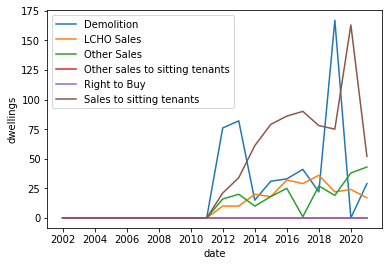

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

dcov = df_t[df_t.loc[:,'LA']=='Coventry'].copy()
dcov_t = dcov[dcov.loc[:,'year']>2001]

fig, ax = plt.subplots()
for x in df_t.columns[3:9]:
    sns.lineplot(x='date',y=x,data=dcov_t)
plt.legend(df_t.columns[3:9])
plt.ylabel('dwellings')

In [22]:
dcov_t.head()

type,LA_code,LA,year,Demolition,LCHO Sales,Other Sales,Other sales to sitting tenants,Right to Buy,Sales to sitting tenants,total,date
12373,E08000026,Coventry,2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2002-01-01
12374,E08000026,Coventry,2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2003-01-01
12375,E08000026,Coventry,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2004-01-01
12376,E08000026,Coventry,2005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-01-01
12377,E08000026,Coventry,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006-01-01


In [27]:
dcov_t

type,LA_code,LA,year,Demolition,LCHO Sales,Other Sales,Other sales to sitting tenants,Right to Buy,Sales to sitting tenants,total,date
12373,E08000026,Coventry,2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2002-01-01
12374,E08000026,Coventry,2003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2003-01-01
12375,E08000026,Coventry,2004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2004-01-01
12376,E08000026,Coventry,2005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2005-01-01
12377,E08000026,Coventry,2006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2006-01-01
12378,E08000026,Coventry,2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2007-01-01
12379,E08000026,Coventry,2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008-01-01
12380,E08000026,Coventry,2009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2009-01-01
12381,E08000026,Coventry,2010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-01-01
12382,E08000026,Coventry,2011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-01-01


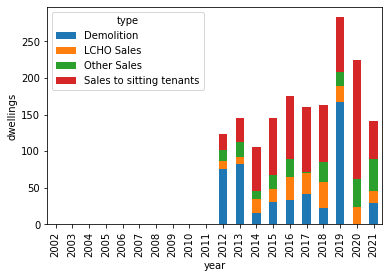

In [31]:
plot = dcov_t[['year','Demolition','LCHO Sales','Other Sales','Sales to sitting tenants']].set_index('year').plot(kind='bar',stacked='True')
plot.set_ylabel('dwellings')
plot.set_facecolor('white')

In [20]:
df_t.to_excel('cleaned datasets/Social Housing Deductions.xlsx')

In [35]:
dcov_t['LCHO Sales'].sum()

218.0

In [36]:
sales = 0
for x in dcov_t.columns[4:9]:
    sales += dcov_t[x].sum()


In [37]:
sales

1174.0

In [40]:
dcov_t.loc[dcov_t.year>2001,'Demolition'].sum()

496.0